# Install Dependencies

In [ ]:
# Download Files
!pip3 install gdown -U

!git clone https://github.com/moses-smt/mosesdecoder.git
!pip3 install indic_nlp_library
!git clone https://github.com/anoopkunchukuttan/indic_nlp_library.git
!pip3 install -r indic_nlp_library/requirements.txt
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

! pip3 install https://github.com/rsennrich/subword-nmt/archive/master.zip


!pip3 install subword_nmt
!pip3 install sacrebleu
!pip3 install ctranslate2
!pip3 install mosestokenizer

<IPython.core.display.Javascript object>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'mosesdecoder'...
remote: Enumerating objects: 148097, done.
remote: Counting objects: 100% (525/525), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 148097 (delta 323), reused 441 (delta 292), pack-reused 147572
Receiving objects: 100% (148097/148097), 129.88 MiB | 17.07 MiB/s, done.
Resolving deltas: 100% (114349/114349), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 3.4 MB/s 
     |████████████████████████████████| 2.8 MB 55.0 MB/s 
Cloning into 'indic_nlp_library'...
remote: Enumerating objects: 1325, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 1325 (delta 91), reused 82 (delta 82), pack-reused 1218
Receiving objects: 100% (1325/1325), 9.55 MiB | 15.87 MiB/s, done.
Resolvin

In [ ]:
!git clone https://github.com/pytorch/fairseq
%cd fairseq
!pip install ./
%cd ..

<IPython.core.display.Javascript object>

Cloning into 'fairseq'...
remote: Enumerating objects: 31434, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 31434 (delta 23), reused 39 (delta 20), pack-reused 31381
Receiving objects: 100% (31434/31434), 21.69 MiB | 15.73 MiB/s, done.
Resolving deltas: 100% (23110/23110), done.
/content/fairseq
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/fairseq
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend de

In [ ]:
# add fairseq folder to python path
import os
os.environ['PYTHONPATH'] += ":/content/fairseq/"
# sanity check to see if fairseq is installed
from fairseq import checkpoint_utils, distributed_utils, options, tasks, utils

<IPython.core.display.Javascript object>

2022-05-27 11:04:10 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


In [ ]:
%%bash
export PYTHONPATH=$PYTHONPATH:/content/indic_nlp_library
export INDIC_RESOURCES_PATH=/content/indic_nlp_resources

echo $INDIC_RESOURCES_PATH
echo $PYTHONPATH

<IPython.core.display.Javascript object>

/content/indic_nlp_resources
/env/python:/content/fairseq/:/content/indic_nlp_library


# Download Data

In [ ]:
! wget https://storage.googleapis.com/samanantar-public/V0.2/data/en2indic/en-mr.zip
! unzip en-mr.zip

<IPython.core.display.Javascript object>

--2022-05-27 11:04:10--  https://storage.googleapis.com/samanantar-public/V0.2/data/en2indic/en-mr.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769637789 (734M) [application/zip]
Saving to: ‘en-mr.zip’

en-mr.zip           100%[===================>] 733.98M  84.7MB/s    in 9.1s    

2022-05-27 11:04:20 (81.1 MB/s) - ‘en-mr.zip’ saved [769637789/769637789]

Archive:  en-mr.zip
   creating: en-mr/
 extracting: en-mr/train.mr          
 extracting: en-mr/train.en          


In [ ]:
! wget https://storage.googleapis.com/samanantar-public/V0.2/data/en2indic/en-hi.zip
! unzip en-hi.zip

<IPython.core.display.Javascript object>

--2022-05-27 11:04:25--  https://storage.googleapis.com/samanantar-public/V0.2/data/en2indic/en-hi.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2853073724 (2.7G) [application/zip]
Saving to: ‘en-hi.zip’

en-hi.zip           100%[===================>]   2.66G  92.9MB/s    in 29s     

2022-05-27 11:04:55 (92.5 MB/s) - ‘en-hi.zip’ saved [2853073724/2853073724]

Archive:  en-hi.zip
   creating: en-hi/
 extracting: en-hi/train.hi          
 extracting: en-hi/train.en          


In [ ]:
# Lowering amount of data. For full training use all data
sourceValidLen = 2000
targetValidLen = 2000

sourceTestLen = 10000
targetTestLen = 10000

sourceTrainLen = 50000
targetTrainLen = 50000

<IPython.core.display.Javascript object>

In [ ]:
!mkdir data
!mkdir data/en-mr
sourceData = open("en-mr/train.en", 'r').readlines()
targetData = open("en-mr/train.mr", 'r').readlines()

sourceValid = sourceData[0:sourceValidLen]
targetValid = targetData[0:targetValidLen]

sourceTest = sourceData[sourceValidLen:sourceValidLen + sourceTestLen]
targetTest = targetData[targetValidLen:targetValidLen + targetTestLen]

sourceTrain = sourceData[sourceValidLen + sourceTestLen:sourceValidLen + sourceTestLen + sourceTrainLen]
targetTrain = targetData[targetValidLen + targetTestLen:targetValidLen + targetTestLen + targetTrainLen]

sourceTestFile = open("data/en-mr/test.en", "w+")
for line in sourceTest:
  sourceTestFile.write(line.strip("\n") + "\n")
sourceTestFile.close()

targetTestFile = open("data/en-mr/test.mr", "w+")
for line in targetTest:
  targetTestFile.write(line.strip("\n") + "\n")
targetTestFile.close()

sourceValidFile = open("data/en-mr/valid.en", "w+")
for line in sourceValid:
  sourceValidFile.write(line.strip("\n") + "\n")
sourceValidFile.close()

targetValidFile = open("data/en-mr/valid.mr", "w+")
for line in targetValid:
  targetValidFile.write(line.strip("\n") + "\n")
targetValidFile.close()

sourceTrainFile = open("data/en-mr/train.en", "w+")
for line in sourceTrain:
  sourceTrainFile.write(line.strip("\n") + "\n")
sourceTrainFile.close()

targetTrainFile = open("data/en-mr/train.mr", "w+")
for line in targetTrain:
  targetTrainFile.write(line.strip("\n") + "\n")
targetTrainFile.close()


<IPython.core.display.Javascript object>

In [ ]:
!mkdir data/en-hi
sourceData = open("en-hi/train.en", 'r').readlines()
targetData = open("en-hi/train.hi", 'r').readlines()

sourceValid = sourceData[0:sourceValidLen]
targetValid = targetData[0:targetValidLen]

sourceTest = sourceData[sourceValidLen:sourceValidLen + sourceTestLen]
targetTest = targetData[targetValidLen:targetValidLen + targetTestLen]

sourceTrain = sourceData[sourceValidLen + sourceTestLen:sourceValidLen + sourceTestLen + sourceTrainLen]
targetTrain = targetData[targetValidLen + targetTestLen:targetValidLen + targetTestLen + targetTrainLen]

sourceTestFile = open("data/en-hi/test.en", "w+")
for line in sourceTest:
  sourceTestFile.write(line.strip("\n") + "\n")
sourceTestFile.close()

targetTestFile = open("data/en-hi/test.hi", "w+")
for line in targetTest:
  targetTestFile.write(line.strip("\n") + "\n")
targetTestFile.close()

sourceValidFile = open("data/en-hi/valid.en", "w+")
for line in sourceValid:
  sourceValidFile.write(line.strip("\n") + "\n")
sourceValidFile.close()

targetValidFile = open("data/en-hi/valid.hi", "w+")
for line in targetValid:
  targetValidFile.write(line.strip("\n") + "\n")
targetValidFile.close()

sourceTrainFile = open("data/en-hi/train.en", "w+")
for line in sourceTrain:
  sourceTrainFile.write(line.strip("\n") + "\n")
sourceTrainFile.close()

targetTrainFile = open("data/en-hi/train.hi", "w+")
for line in targetTrain:
  targetTrainFile.write(line.strip("\n") + "\n")
targetTrainFile.close()


<IPython.core.display.Javascript object>

# Preprocess Data

## Lowercase English

In [ ]:
!/content/mosesdecoder/scripts/tokenizer/lowercase.perl < data/en-mr/train.en > data/en-mr/train-low.en
!/content/mosesdecoder/scripts/tokenizer/lowercase.perl < data/en-mr/test.en > data/en-mr/test-low.en
!/content/mosesdecoder/scripts/tokenizer/lowercase.perl < data/en-mr/valid.en > data/en-mr/valid-low.en

!/content/mosesdecoder/scripts/tokenizer/lowercase.perl < data/en-hi/train.en > data/en-hi/train-low.en
!/content/mosesdecoder/scripts/tokenizer/lowercase.perl < data/en-hi/test.en > data/en-hi/test-low.en
!/content/mosesdecoder/scripts/tokenizer/lowercase.perl < data/en-hi/valid.en > data/en-hi/valid-low.en

<IPython.core.display.Javascript object>

In [ ]:
!head -10 data/en-mr/train.en

<IPython.core.display.Javascript object>

Some are against it.
[ Footnote] Capernaum was considered to be Jesus home city in the district of Galilee. Mark 2: 1.
PM Narendra Modi and Amit Shah have already held rallies in the state.
childrens education
In many places there had been clashes.
He had joined BJP before the Rajya Sabha polls.
Uddhav Thackeray had visited Ayodhya before the Lok Sabha polls.
Further arrests are expected in the future.
Dont like it.
So, lets say we just put one electrode of lithium here another electrode of something some counter electrode here.


In [ ]:
!head -10 data/en-mr/train-low.en

<IPython.core.display.Javascript object>

some are against it.
[ footnote] capernaum was considered to be jesus home city in the district of galilee. mark 2: 1.
pm narendra modi and amit shah have already held rallies in the state.
childrens education
in many places there had been clashes.
he had joined bjp before the rajya sabha polls.
uddhav thackeray had visited ayodhya before the lok sabha polls.
further arrests are expected in the future.
dont like it.
so, lets say we just put one electrode of lithium here another electrode of something some counter electrode here.


## Tokenize English

In [ ]:
!/content/mosesdecoder/scripts/tokenizer/tokenizer.perl < data/en-mr/train-low.en > data/en-mr/train-tok.en
!/content/mosesdecoder/scripts/tokenizer/tokenizer.perl < data/en-mr/test-low.en > data/en-mr/test-tok.en
!/content/mosesdecoder/scripts/tokenizer/tokenizer.perl < data/en-mr/valid-low.en > data/en-mr/valid-tok.en

!/content/mosesdecoder/scripts/tokenizer/tokenizer.perl < data/en-hi/train-low.en > data/en-hi/train-tok.en
!/content/mosesdecoder/scripts/tokenizer/tokenizer.perl < data/en-hi/test-low.en > data/en-hi/test-tok.en
!/content/mosesdecoder/scripts/tokenizer/tokenizer.perl < data/en-hi/valid-low.en > data/en-hi/valid-tok.en

<IPython.core.display.Javascript object>

Tokenizer Version 1.1
Language: en
Number of threads: 1
Tokenizer Version 1.1
Language: en
Number of threads: 1
Tokenizer Version 1.1
Language: en
Number of threads: 1
Tokenizer Version 1.1
Language: en
Number of threads: 1
Tokenizer Version 1.1
Language: en
Number of threads: 1
Tokenizer Version 1.1
Language: en
Number of threads: 1


In [ ]:
!head -10 data/en-mr/train-tok.en

<IPython.core.display.Javascript object>

some are against it .
&#91; footnote &#93; capernaum was considered to be jesus home city in the district of galilee. mark 2 : 1 .
pm narendra modi and amit shah have already held rallies in the state .
childrens education
in many places there had been clashes .
he had joined bjp before the rajya sabha polls .
uddhav thackeray had visited ayodhya before the lok sabha polls .
further arrests are expected in the future .
dont like it .
so , lets say we just put one electrode of lithium here another electrode of something some counter electrode here .


## Normalize Indic

In [ ]:
!python3 indic_nlp_library/indicnlp/normalize/indic_normalize.py data/en-mr/train.mr data/en-mr/train-norm.mr mr
!python3 indic_nlp_library/indicnlp/normalize/indic_normalize.py data/en-mr/valid.mr data/en-mr/valid-norm.mr mr
!python3 indic_nlp_library/indicnlp/normalize/indic_normalize.py data/en-mr/test.mr data/en-mr/test-norm.mr mr

!python3 indic_nlp_library/indicnlp/normalize/indic_normalize.py data/en-hi/train.hi data/en-hi/train-norm.hi hi
!python3 indic_nlp_library/indicnlp/normalize/indic_normalize.py data/en-hi/valid.hi data/en-hi/valid-norm.hi hi
!python3 indic_nlp_library/indicnlp/normalize/indic_normalize.py data/en-hi/test.hi data/en-hi/test-norm.hi hi

<IPython.core.display.Javascript object>

In [ ]:
!head -10 data/en-mr/train.mr 

<IPython.core.display.Javascript object>

तर काही जण विरोधही करत आहेत.
या माहितीचे परीक्षण करताना आपल्याला कळेल, की आजही येशूचा लोकांवर प्रभाव का पडत आहे. (w१० - E ०४ / ०१)
नरेंद्र मोदी आणि अमित शहा यांनी देशात अराजक माजवले आहे.
मुलाचे शिक्षण
अनेक ठिकाणी पडझडीच्या घटना घडल्या.
मात्र विधानसभा निवडणुकीआधी ते भाजपमध्ये गेले.
लोकसभा निवडणुकीच्या आधी पक्षप्रमुख उद्धव ठाकरे यांनी अयोध्येचा दौरा केला होता.
येत्या काळात आणखी काहींची धरपकड केली जाण्याची शक्यता आहे.
अजिबात आवडला नाही.
तर, आपण इथे लिथियमचे एक इलेक्ट्रोड (electrode) ठेवू या.


In [ ]:
!head -10 data/en-mr/train-norm.mr

<IPython.core.display.Javascript object>

तर काही जण विरोधही करत आहेत.
या माहितीचे परीक्षण करताना आपल्याला कळेल, की आजही येशूचा लोकांवर प्रभाव का पडत आहे. (w१० - E ०४ / ०१)
नरेंद्र मोदी आणि अमित शहा यांनी देशात अराजक माजवले आहे.
मुलाचे शिक्षण
अनेक ठिकाणी पडझडीच्या घटना घडल्या.
मात्र विधानसभा निवडणुकीआधी ते भाजपमध्ये गेले.
लोकसभा निवडणुकीच्या आधी पक्षप्रमुख उद्धव ठाकरे यांनी अयोध्येचा दौरा केला होता.
येत्या काळात आणखी काहींची धरपकड केली जाण्याची शक्यता आहे.
अजिबात आवडला नाही.
तर, आपण इथे लिथियमचे एक इलेक्ट्रोड (electrode) ठेवू या.


## Tokenize Indic

Note: Uncomment if the part after `if __name__ == '__main__':` in the file `indic_nlp_library/indicnlp/tokenize/indic_tokenize.py`

In [ ]:
!python3 indic_nlp_library/indicnlp/tokenize/indic_tokenize.py data/en-mr/train-norm.mr data/en-mr/train-tok.mr mr
!python3 indic_nlp_library/indicnlp/tokenize/indic_tokenize.py data/en-mr/valid-norm.mr data/en-mr/valid-tok.mr mr
!python3 indic_nlp_library/indicnlp/tokenize/indic_tokenize.py data/en-mr/test-norm.mr data/en-mr/test-tok.mr mr

!python3 indic_nlp_library/indicnlp/tokenize/indic_tokenize.py data/en-hi/train-norm.hi data/en-hi/train-tok.hi hi
!python3 indic_nlp_library/indicnlp/tokenize/indic_tokenize.py data/en-hi/valid-norm.hi data/en-hi/valid-tok.hi hi
!python3 indic_nlp_library/indicnlp/tokenize/indic_tokenize.py data/en-hi/test-norm.hi data/en-hi/test-tok.hi hi

<IPython.core.display.Javascript object>

In [ ]:
!head -10 data/en-mr/train-tok.mr

<IPython.core.display.Javascript object>

तर काही जण विरोधही करत आहेत . 
या माहितीचे परीक्षण करताना आपल्याला कळेल , की आजही येशूचा लोकांवर प्रभाव का पडत आहे . ( w१० - E ०४ / ०१ ) 
नरेंद्र मोदी आणि अमित शहा यांनी देशात अराजक माजवले आहे . 
मुलाचे शिक्षण
अनेक ठिकाणी पडझडीच्या घटना घडल्या . 
मात्र विधानसभा निवडणुकीआधी ते भाजपमध्ये गेले . 
लोकसभा निवडणुकीच्या आधी पक्षप्रमुख उद्धव ठाकरे यांनी अयोध्येचा दौरा केला होता . 
येत्या काळात आणखी काहींची धरपकड केली जाण्याची शक्यता आहे . 
अजिबात आवडला नाही . 
तर , आपण इथे लिथियमचे एक इलेक्ट्रोड ( electrode ) ठेवू या . 


## Apply Byte Pair Encoding (BPE)

In [ ]:
! mkdir data/full
! cat data/en-mr/train-tok.en data/en-mr/test-tok.en data/en-mr/valid-tok.en data/en-hi/train-tok.en data/en-hi/test-tok.en data/en-hi/valid-tok.en > data/full/full.en
! cat data/en-mr/train-tok.mr data/en-mr/test-tok.mr data/en-mr/valid-tok.mr data/en-hi/train-tok.hi data/en-hi/test-tok.hi data/en-hi/valid-tok.hi > data/full/full.himr

<IPython.core.display.Javascript object>

In [ ]:
!mkdir codes
!mkdir data/en-mr/bpe
!mkdir data/en-hi/bpe

!subword-nmt learn-bpe --num-workers 128 -s 16000 < data/full/full.en > codes/codes.en
!subword-nmt learn-bpe --num-workers 128 -s 16000 < data/full/full.himr > codes/codes.himr

!subword-nmt apply-bpe -c codes/codes.en < data/full/full.en > data/full/full-bpe.en
!subword-nmt apply-bpe -c codes/codes.himr < data/full/full.himr > data/full/full-bpe.himr


!subword-nmt apply-bpe -c codes/codes.en < data/en-mr/train-tok.en > data/en-mr/bpe/train-bpe.en
!subword-nmt apply-bpe -c codes/codes.en < data/en-mr/test-tok.en > data/en-mr/bpe/test-bpe.en
!subword-nmt apply-bpe -c codes/codes.en < data/en-mr/valid-tok.en > data/en-mr/bpe/valid-bpe.en

!subword-nmt apply-bpe -c codes/codes.en < data/en-hi/train-tok.en > data/en-hi/bpe/train-bpe.en
!subword-nmt apply-bpe -c codes/codes.en < data/en-hi/test-tok.en > data/en-hi/bpe/test-bpe.en
!subword-nmt apply-bpe -c codes/codes.en < data/en-hi/valid-tok.en > data/en-hi/bpe/valid-bpe.en



!subword-nmt apply-bpe -c codes/codes.himr < data/en-mr/train-tok.mr > data/en-mr/bpe/train-bpe.mr
!subword-nmt apply-bpe -c codes/codes.himr < data/en-mr/test-tok.mr > data/en-mr/bpe/test-bpe.mr
!subword-nmt apply-bpe -c codes/codes.himr < data/en-mr/valid-tok.mr > data/en-mr/bpe/valid-bpe.mr

!subword-nmt apply-bpe -c codes/codes.himr < data/en-hi/train-tok.hi > data/en-hi/bpe/train-bpe.hi
!subword-nmt apply-bpe -c codes/codes.himr < data/en-hi/test-tok.hi > data/en-hi/bpe/test-bpe.hi
!subword-nmt apply-bpe -c codes/codes.himr < data/en-hi/valid-tok.hi > data/en-hi/bpe/valid-bpe.hi


<IPython.core.display.Javascript object>

100% 16000/16000 [00:20<00:00, 794.20it/s]
100% 16000/16000 [00:30<00:00, 522.22it/s] 


## Create Dictionary

In [ ]:
! mkdir dict
! python3 fairseq/fairseq_cli/preprocess.py --source-lang en --target-lang himr --trainpref data/full/full-bpe --destdir dict --workers 40 --dict-only

<IPython.core.display.Javascript object>

2022-05-27 11:07:55 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-05-27 11:07:56 | INFO | fairseq_cli.preprocess | Namespace(aim_repo=None, aim_run_hash=None, align_suffix=None, alignfile=None, all_gather_list_size=16384, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, azureml_logging=False, bf16=False, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='dict', dict_only=True, empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_file=None, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, on_cpu_convert_precision=False, only_source=False, optimizer=None, padding_factor=8, plasma_path='/tmp/plasma', profile=False, qua

# Preprocess Data

In [ ]:
! mkdir pre
! fairseq-preprocess --source-lang en --target-lang mr --srcdict dict/dict.en.txt --tgtdict dict/dict.himr.txt --trainpref data/en-mr/bpe/train-bpe --validpref data/en-mr/bpe/valid-bpe --testpref data/en-mr/bpe/test-bpe --destdir pre --workers 40
! fairseq-preprocess --source-lang en --target-lang hi --srcdict dict/dict.en.txt --tgtdict dict/dict.himr.txt --trainpref data/en-hi/bpe/train-bpe --validpref data/en-hi/bpe/valid-bpe --testpref data/en-hi/bpe/test-bpe --destdir pre --workers 40


<IPython.core.display.Javascript object>

2022-05-27 11:08:14 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-05-27 11:08:14 | INFO | fairseq_cli.preprocess | Namespace(aim_repo=None, aim_run_hash=None, align_suffix=None, alignfile=None, all_gather_list_size=16384, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, azureml_logging=False, bf16=False, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='pre', dict_only=False, empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_file=None, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, on_cpu_convert_precision=False, only_source=False, optimizer=None, padding_factor=8, plasma_path='/tmp/plasma', profile=False, qua

# Train

### Model
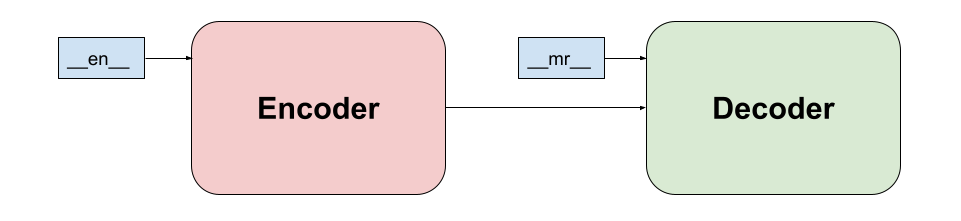

In [ ]:
! mkdir checkpoints
! mkdir board

! fairseq-train pre \
  --arch transformer_wmt_en_de \
  --task translation_multi_simple_epoch \
  --encoder-langtok src \
  --decoder-langtok \
  --lang-pairs en-hi,en-mr \
  --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
  --optimizer adam --adam-betas '(0.9, 0.98)' \
  --lr-scheduler inverse_sqrt --lr 5e-04 --warmup-updates 4000 --max-update 400000 \
  --dropout 0.3 --weight-decay 0.0001 \
  --max-tokens 4096 --update-freq 8 \
  --save-interval 1 --save-interval-updates 5000 --keep-interval-updates 20 --no-epoch-checkpoints \
  --log-format simple --log-interval 100 \
  --fp16 --save-dir checkpoints --validate-interval-updates 1000 \
  --tensorboard-logdir board

<IPython.core.display.Javascript object>

mkdir: cannot create directory ‘checkpoints’: File exists
mkdir: cannot create directory ‘board’: File exists
2022-05-27 11:11:27 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-05-27 11:11:29 | INFO | fairseq_cli.train | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': 'simple', 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': 'board', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_l

In [ ]:
%cd fairseq
! python setup.py build_ext --inplace
%cd ..

<IPython.core.display.Javascript object>

/content/fairseq
running build_ext
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:387: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
cythoning fairseq/data/data_utils_fast.pyx to fairseq/data/data_utils_fast.cpp
cythoning fairseq/data/token_block_utils_fast.pyx to fairseq/data/token_block_utils_fast.cpp
building 'fairseq.libbleu' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/fairseq
creating build/temp.linux-x86_64-3.7/fairseq/clib
creating build/temp.linux-x86_64-3.7/fairseq/clib/libbleu
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/

In [ ]:
! fairseq-generate pre \
    --path checkpoints/checkpoint_best.pt \
    --batch-size 128 --beam 5 \
    --source-lang en --target-lang hi \
    --task translation_multi_simple_epoch \
    --encoder-langtok src \
    --decoder-langtok \
    --lang-pairs en-hi,en-mr